Epoch 1/150
782/782 [==============================] - 50s 64ms/step - loss: 2.1118 - accuracy: 0.2773 - val_loss: 1.6922 - val_accuracy: 0.3776
Epoch 2/150
782/782 [==============================] - 46s 59ms/step - loss: 1.5431 - accuracy: 0.4346 - val_loss: 1.7561 - val_accuracy: 0.4371
Epoch 3/150
782/782 [==============================] - 49s 63ms/step - loss: 1.3305 - accuracy: 0.5199 - val_loss: 1.3284 - val_accuracy: 0.5497
Epoch 4/150
782/782 [==============================] - 47s 60ms/step - loss: 1.1782 - accuracy: 0.5835 - val_loss: 1.0844 - val_accuracy: 0.6265
Epoch 5/150
782/782 [==============================] - 47s 60ms/step - loss: 1.0574 - accuracy: 0.6317 - val_loss: 0.8909 - val_accuracy: 0.6896
Epoch 6/150
782/782 [==============================] - 47s 60ms/step - loss: 0.9768 - accuracy: 0.6620 - val_loss: 0.8398 - val_accuracy: 0.7180
Epoch 7/150
782/782 [==============================] - 47s 60ms/step - loss: 0.9076 - accuracy: 0.6895 - val_loss: 0.9048 - val_ac

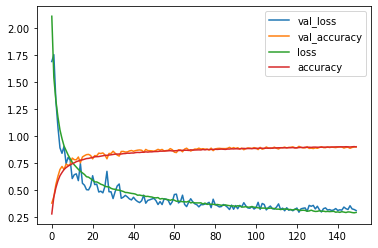

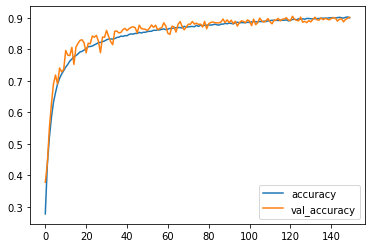

In [7]:

"""
Created on Thu Jul 16 12:30:12 2020

@author: Anshdeep

The following program is a image classification training model based on the CIFAR-10 dataset which is a collection 
of images of 10 different classes like cars, birds, dogs, horses, ships, trucks, etc. and is entierly based on training
the model and plots the test and train accuracies and losses and saves the data into CIFAR10_.h5 file which can be imported 
and tested as done in Testing_Model.ipynb file. 
"""
 
import pandas as pd
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.layers import MaxPooling2D
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator

# This function loads the images to x_test , x_train , y_test and y_train and normailzes the x_test and x_train and categorize y_test and y_train 
def loading_dataset():
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()
    y1_train = to_categorical(y_train)
    y1_test = to_categorical(y_test)
    
    x_test  = x_test/255.0
    x_train  =  x_train/255.0
    
    return x_test , x_train , y1_test , y1_train , y_test , y_train

# Defining the model to train data 
def training_model():
    model= Sequential()
    # Adding a 2D convolutional layer with 32 filters, kernel size of 3x3 and kernel initilizer as he_uniform
    # Dropouts help reduce overfitting and BatchNormalization to enhance the learning quality in each layer
    model.add(Conv2D(32 , ( 3,3 ) , input_shape = ( 32,32,3 ) , activation = 'relu' , kernel_initializer = 'he_uniform' , padding = 'same' ) ) # input layer
    model.add(Conv2D(32 , ( 3,3 ) , activation = 'relu' , kernel_initializer = 'he_uniform' , padding = 'same' ) ) # Following are the hidden layers of the model
    model.add(BatchNormalization())
    model.add(MaxPooling2D( ( 2,2 ) ) )
    model.add(Dropout(0.2))
    
    model.add(Conv2D(64 , ( 3,3 ) , activation = 'relu' , kernel_initializer = 'he_uniform' , padding = 'same' ) )
    model.add(BatchNormalization())
    model.add(Conv2D(64 , ( 3,3 ) , activation = 'relu' , kernel_initializer = 'he_uniform' , padding = 'same' ) )
    model.add(BatchNormalization())
    model.add(MaxPooling2D( ( 2,2 ) ) )
    model.add(Dropout(0.3))
    
    model.add(Conv2D(128 , ( 3,3 ) , activation = 'relu' , kernel_initializer = 'he_uniform' , padding = 'same' ) )
    model.add(BatchNormalization())
    model.add(Conv2D(128 , ( 3,3 ) , activation = 'relu' , kernel_initializer = 'he_uniform' , padding = 'same' ) )
    model.add(BatchNormalization())
    model.add(MaxPooling2D( ( 2,2 ) ) )
    model.add(Dropout(0.5))
    
    model.add(Conv2D(256 , ( 3,3 ) , activation = 'relu' , kernel_initializer = 'he_uniform' , padding = 'same' ) )
    model.add(BatchNormalization())
    model.add(Conv2D(256 , ( 3,3 ) , activation = 'relu' , kernel_initializer = 'he_uniform' , padding = 'same' ) )
    model.add(BatchNormalization())
    model.add(MaxPooling2D( ( 2,2 ) ) )
    model.add(Dropout(0.5))

    model.add(Conv2D(512 , ( 3,3 ) , activation = 'relu' , kernel_initializer = 'he_uniform' , padding = 'same' ) )
    model.add(BatchNormalization())
    model.add(Conv2D(512 , ( 3,3 ) , activation = 'relu' , kernel_initializer = 'he_uniform' , padding = 'same' ) )
    model.add(BatchNormalization())
    model.add(MaxPooling2D( ( 2,2 ) ) )
    model.add(Dropout(0.5))
    
    model.add(Flatten()) 
    model.add(Dense(256, activation = 'relu' , kernel_initializer = 'he_uniform'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(10 , activation = 'softmax')) # Output Layer
    
    model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics=["accuracy"])
    
    return model

# Loads the data and trains it and evaluates it
def test_run():
    x_test, x_train , y1_test , y1_train , y_test , y_train = loading_dataset() # Storing the values returned by Loading_dataset()   
    
    model = training_model() # Storing the traning model 
    
    datagen = ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True) # Minimizing overfitting
    it_train = datagen.flow(x_train, y1_train, batch_size=64)
    # Training the Model
    saved_model = model.fit_generator( it_train , epochs = 150 , validation_data= ( x_test , y1_test ))
    # Accuracy and Loss plot for train and test data
    eval1 = pd.DataFrame(model.history.history)
    eval1.plot()
    print(eval1)

    metrics = pd.DataFrame(saved_model.history)
    metrics[['accuracy' , 'val_accuracy']].plot()

    return model

x  = test_run()
x.save('CIFAR10_.h5') # Saves the model into as CIFAR10_.h5 file



In [8]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
(p_x_train , p_y_train) , (p_x_test , p_y_test) = cifar10.load_data() 
p_x_test = p_x_test/255.0
p_x_train = p_x_train/255.0
predictions = np.argmax(x.predict(p_x_test), axis=-1)

print(classification_report(p_y_test ,predictions))
print(confusion_matrix(p_y_test ,predictions))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      1000
           1       0.96      0.96      0.96      1000
           2       0.91      0.84      0.87      1000
           3       0.84      0.75      0.79      1000
           4       0.87      0.93      0.90      1000
           5       0.88      0.81      0.84      1000
           6       0.83      0.97      0.89      1000
           7       0.93      0.92      0.93      1000
           8       0.94      0.95      0.95      1000
           9       0.95      0.96      0.95      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

[[927   4  11   7   8   0   2   5  27   9]
 [  3 961   0   0   0   0   2   0   6  28]
 [ 28   1 837  16  27  26  48  10   5   2]
 [  9   2  34 749  42  69  71  14   8   2]
 [  2   1  11   6 932   6  26  15   1   0]
 [  2   2  12  90  28 807 

In [ ]:
x.save('CIFAR10_.h5')